# fake datset for clasification task 

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score,roc_curve,accuracy_score

In [72]:
df = pd.read_csv(r"C:\Users\Victus\Downloads\diabetes (1).csv")

In [73]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [74]:
X = df.drop("Outcome",axis= 1)

In [75]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


When you see `axis=1` in pandas operations like `drop()`, it's telling pandas to look **along the columns** instead of the rows. Here's how it works:

### 🧭 Axis Parameter in Pandas
| Value       | Direction | Typical Use                                |
|-------------|-----------|---------------------------------------------|
| `axis=0`    | Rows      | Operate **down** the DataFrame (vertical)   |
| `axis=1`    | Columns   | Operate **across** the DataFrame (horizontal) |

So in your code:
```python
X = df.drop('Target', axis=1)
```
You're telling pandas: *“Drop the `'Target'` column.”* If you'd used `axis=0`, it would look for a row named `'Target'`, which likely doesn’t exist and would cause an error.

📌 Think of it like this:
- `axis=0`: Go down the rows
- `axis=1`: Go across the columns

Want to peek under the hood with a small example? I can show how dropping along different axes works in practice.


In [76]:
y = df["Outcome"]

In [77]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [78]:
print(type(y))

<class 'pandas.core.series.Series'>


In [79]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)


Based on your dataset, Prateek, **yes—feature scaling is a smart move**. Here's why:

### 📊 Why Scaling Matters for Logistic Regression
The algorithm you're using (`LogisticRegression` with solver `'lbfgs'`) relies on **gradient-based optimization**, which performs best when features are on similar scales. In your case:
- 🔢 Features like `Glucose`, `Insulin`, and `Age` have very different ranges.
- 📉 Features like `BMI` and `DiabetesPedigreeFunction` vary more smoothly.
- 🧨 Unscaled data can cause slower convergence or failure to converge (which you already hit).

### ✅ Recommended Scaling Approach
Use `StandardScaler` to normalize your features to **mean 0 and standard deviation 1**:
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

Then fit your model:
```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)
```

> Bonus tip: You can explore `MinMaxScaler` too, especially for models that aren't sensitive to mean/std like tree-based methods.




In [87]:
X_test_scaled = scaler.transform(X_test)

### ⚖️ Should You Scale Just `X_train` or the Whole `X`?
You should **fit the scaler on `X_train` only**, and then **transform both `X_train` and `X_test` using that fitted scaler**.

### 🧠 Why?
- Fitting the scaler on the entire `X` exposes it to test data, which breaks the principle of training-test separation and risks **data leakage**.
- The model learns based on patterns from training data only—scaling should reflect those patterns.

---

### ✅ Proper Workflow Example
```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform test data
X_test_scaled = scaler.transform(X_test)
```

Now both sets are scaled consistently, but only using info from the training set—clean and leak-proof!

Want to validate the effect of scaling visually or check model performance before and after? Let’s dig deeper!


Excellent follow-through, Prateek! 👏 For evaluation, you should definitely use **`X_test_scaled`**—the same scaled features you used during model training.

### ✅ Why Evaluate on `X_test_scaled`?
- Your model was trained on `X_train_scaled`, which means it's learned to make predictions based on **standardized inputs**.
- Feeding it raw `X_test` would confuse it, since the feature distribution and scale wouldn’t match what it learned.
- All evaluation metrics—accuracy, precision, recall, F1-score, ROC AUC—should be computed using predictions from `X_test_scaled`.

---

### 🧪 Example Evaluation Workflow
```python
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
```

You could even plot an ROC curve or precision-recall curve to visualize performance. Want to explore that next? I can walk you through it!


In [88]:
model= LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [90]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [92]:
y_prob = model.predict_proba(X_test_scaled)
y_prob

array([[0.72263617, 0.27736383],
       [0.81404023, 0.18595977],
       [0.88534248, 0.11465752],
       [0.82860383, 0.17139617],
       [0.53156207, 0.46843793],
       [0.56005354, 0.43994646],
       [0.98380786, 0.01619214],
       [0.34044883, 0.65955117],
       [0.4638363 , 0.5361637 ],
       [0.22941719, 0.77058281],
       [0.74606101, 0.25393899],
       [0.10858721, 0.89141279],
       [0.6671275 , 0.3328725 ],
       [0.68711136, 0.31288864],
       [0.91465106, 0.08534894],
       [0.61368286, 0.38631714],
       [0.86059327, 0.13940673],
       [0.92345967, 0.07654033],
       [0.14219013, 0.85780987],
       [0.44478326, 0.55521674],
       [0.79158177, 0.20841823],
       [0.92091385, 0.07908615],
       [0.46879212, 0.53120788],
       [0.90456083, 0.09543917],
       [0.46502003, 0.53497997],
       [0.12011811, 0.87988189],
       [0.87554271, 0.12445729],
       [0.96894618, 0.03105382],
       [0.75198313, 0.24801687],
       [0.8805016 , 0.1194984 ],
       [0.

In [94]:
y_prob = model.predict_proba(X_test_scaled)[:,1] # probablity for class -1 
y_prob

array([0.27736383, 0.18595977, 0.11465752, 0.17139617, 0.46843793,
       0.43994646, 0.01619214, 0.65955117, 0.5361637 , 0.77058281,
       0.25393899, 0.89141279, 0.3328725 , 0.31288864, 0.08534894,
       0.38631714, 0.13940673, 0.07654033, 0.85780987, 0.55521674,
       0.20841823, 0.07908615, 0.53120788, 0.09543917, 0.53497997,
       0.87988189, 0.12445729, 0.03105382, 0.24801687, 0.1194984 ,
       0.90715973, 0.86727835, 0.75769995, 0.83300134, 0.62049806,
       0.6859238 , 0.96539288, 0.24975122, 0.5087476 , 0.72360145,
       0.07120025, 0.59431639, 0.58176342, 0.33064973, 0.02881938,
       0.50697619, 0.65016588, 0.22505347, 0.36974282, 0.95579301,
       0.04959779, 0.66377551, 0.8097042 , 0.24806187, 0.09427575,
       0.04265584, 0.77095657, 0.00599514, 0.41303377, 0.74746918,
       0.73572228, 0.34807356, 0.20057534, 0.21605177, 0.07785928,
       0.61718538, 0.05196959, 0.7259848 , 0.03900445, 0.71522747,
       0.67587109, 0.07200265, 0.18294234, 0.11486192, 0.09280

In [96]:
# evaluation 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [106]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [97]:
print(confusion_matrix(y_test,y_pred))

[[79 20]
 [18 37]]


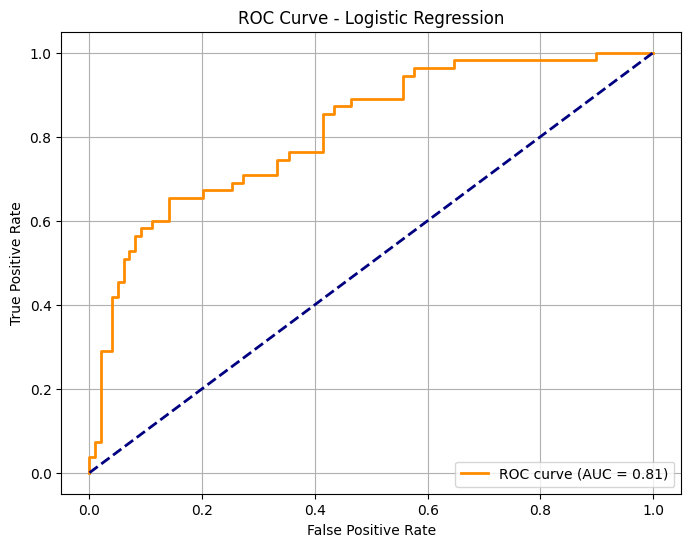

In [110]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [98]:
print(roc_auc_score(y_test,y_prob))

0.8146923783287419


In [58]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate synthetic classification data
X, y = make_classification(
    n_samples=1000,     # number of rows
    n_features=5,       # total features
    n_informative=3,    # features that actually impact the target
    n_redundant=1,      # redundant features (linear combinations)
    n_classes=2,        # binary classification
    random_state=42
)

# Create DataFrame
columns = [f'Feature_{i+1}' for i in range(X.shape[1])]
df_classification = pd.DataFrame(X, columns=columns)
df_classification['Target'] = y

# Save to CSV
df_classification.to_csv("binary_classification_data.csv", index=False)

print("✅ Binary classification dataset created and saved as 'binary_classification_data.csv'")
print(df_classification.head())


✅ Binary classification dataset created and saved as 'binary_classification_data.csv'
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Target
0  -0.038769  -0.649239  -0.224746  -1.346275   0.126879       0
1   1.005284  -1.373239   1.157346   0.126493   1.422799       0
2  -0.742455  -0.573257   1.688442  -2.588237   0.762562       0
3  -1.587158   1.758582  -0.930664   0.764614   2.415399       1
4   0.195806  -0.058897  -0.549360   0.777375   1.147261       1
